# Módulo 4: Árvores I
# Exercício 1

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [227]:
# importando bibliotecas

import numpy as np
import pandas as pd
import os
import seaborn as sns
%matplotlib inline 

# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('demo01.csv')
df_credito = pd.DataFrame(arquivo)

# informações sobre os dados

df_credito.head(3)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False


In [228]:
# quantidade de linhas e colunas

df_credito.shape

(16650, 16)

In [229]:
# informações do DataFrame

df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [230]:
# quantidade de missings

df_credito.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [231]:
# distribuição da variável "mau"

quantidade_linhas = df_credito.shape[0]
mau_pagador = df_credito['mau'].sum()
distribuicao_mau_pagador = mau_pagador / quantidade_linhas

print(f'A quantidade de tuplas é: {quantidade_linhas}')
print(f'O total de "mau" pagador é: {mau_pagador}')
print(f'A porcentagem de mau pagador é: {distribuicao_mau_pagador: .2%}')

A quantidade de tuplas é: 16650
O total de "mau" pagador é: 390
A porcentagem de mau pagador é:  2.34%


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [232]:
# 2.1)DataFrame com variável e tipo de dados

info_variaveis = pd.DataFrame({
    'Variável': df_credito.columns,
    'Tipo de Dados': df_credito.dtypes
})

info_variaveis.head(info_variaveis.shape[0])

,Variável,Tipo de Dados
sexo,sexo,object
posse_de_veiculo,posse_de_veiculo,object
posse_de_imovel,posse_de_imovel,object
qtd_filhos,qtd_filhos,int64
tipo_renda,tipo_renda,object
educacao,educacao,object
estado_civil,estado_civil,object
tipo_residencia,tipo_residencia,object
idade,idade,float64
tempo_emprego,tempo_emprego,float64


In [233]:
# 2.2)coluna "qtd_categorias"

info_variaveis['qtd_categorias'] = df_credito.nunique()

info_variaveis.head(info_variaveis.shape[0])


,Variável,Tipo de Dados,qtd_categorias
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,8
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,5298
tempo_emprego,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [234]:
# 3) variáveis dummy

# variável sexo
df_credito['sexo'] = df_credito['sexo'].map({'F': 1, 'M': 0})
df_credito['sexo'].dtypes


dtype('int64')

In [235]:
# 3) variáveis dummy

# variável "posse_de_veiculo"
df_credito['posse_de_veiculo'] = df_credito['posse_de_veiculo'].map({'Y': 1, 'N': 0})
df_credito['posse_de_veiculo'].dtypes


dtype('int64')

In [236]:
# 3) variáveis dummy

# variável "posse_de_imóvel"
df_credito['posse_de_imovel'] = df_credito['posse_de_imovel'].map({'Y': 1, 'N': 0})
df_credito['posse_de_imovel'].dtypes

dtype('int64')

In [237]:
# valores únicos de "tipo_renda"
valores_tipo_renda = df_credito['tipo_renda'].unique()
valores_tipo_renda

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [238]:
# 3) variáveis dummy

# variável "tipo_renda"
df_credito['tipo_renda'] = df_credito['tipo_renda'].map({
    'Working': 1,
    'Commercial associate': 2,
    'State servant': 3,
    'Pensioner': 4,
    'Student': 5
})

df_credito['tipo_renda'].dtypes


dtype('int64')

In [239]:
# valores únicos "educacao"
valores_educacao = df_credito['educacao'].unique()
valores_educacao

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [240]:
# 3) variáveis dummy

# variável "educacao"
df_credito['educacao'] = df_credito['educacao'].map({
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
})

df_credito['educacao'].dtypes


dtype('int64')

In [241]:
# valores únicos de "estado_civil"
valores_estado_civil = df_credito['estado_civil'].unique()
valores_estado_civil

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [242]:
# 3) variáveis dummy

# variável "estado_civil"
df_credito['estado_civil'] = df_credito['estado_civil'].map({
    'Single / not married': 1,
    'Married': 2,
    'Civil marriage': 3,
    'Separated': 4,
    'Widow': 5
})

df_credito['estado_civil'].dtypes


dtype('int64')

In [243]:
# valores únicos de "tipo_residencia"
valores_tipo_residencia = df_credito['tipo_residencia'].unique()
valores_tipo_residencia

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [244]:
# 3) variáveis dummy

# variável "tipo_residencia"
df_credito['tipo_residencia'] = df_credito['tipo_residencia'].map({
    'House / apartment': 1,
    'Rented apartment': 2,
    'Municipal apartment': 3,
    'With parents': 4,
    'Co-op apartment': 5,
    'Office apartment': 6
})

df_credito['tipo_residencia'].dtypes


dtype('int64')

In [245]:
# 3) variáveis dummy

# variável "mau"
df_credito.mau = df_credito.mau.astype(int)

df_credito['mau'].dtypes

dtype('int32')

In [246]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  int64  
 1   posse_de_veiculo       16650 non-null  int64  
 2   posse_de_imovel        16650 non-null  int64  
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  int64  
 5   educacao               16650 non-null  int64  
 6   estado_civil           16650 non-null  int64  
 7   tipo_residencia        16650 non-null  int64  
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [247]:
# tabela cruzada
tabela_cruzada = pd.crosstab(index=df_credito['possui_email'], columns=df_credito['posse_de_veiculo'])
tabela_cruzada




posse_de_veiculo,0,1
possui_email,,
0,9341,5829
1,837,643


In [248]:
# porcentagem de linha

percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1),axis=0)
percentual_linha

posse_de_veiculo,0,1
possui_email,,
0,0.615755,0.384245
1,0.565541,0.434459


<Figure size 1000x600 with 0 Axes>

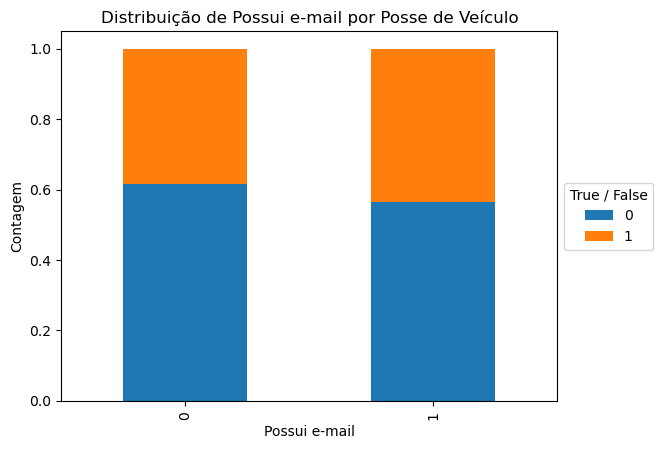

In [249]:
# gráfico
plt.figure(figsize=(10, 6))
percentual_linha.plot(kind='bar', stacked=True)

plt.xlabel('Possui e-mail')
plt.ylabel('Contagem')
plt.title('Distribuição de Possui e-mail por Posse de Veículo')
plt.legend(title='True / False', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Resposta: Observando a frequências das variáveis "possui_email" e "posse_de_veiculo" notamos que há variação significativa em relação à variável "mau"

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [250]:
# Salvar arquivo .csv

base_dados = df_credito
file_name = 'analise_credito.csv'

if os.path.exists(file_name):
        print(f"O arquivo '{file_name}' já existe.")
else:
        base_dados.to_csv(file_name, index=False)
        print(f"Arquivo salvo como  '{file_name}'")

O arquivo 'analise_credito.csv' já existe.
